In [1]:
from wordcloud import WordCloud
import numpy as np
import pandas as pd
import nltk                                   # Natural Language Tool Kit (영어).
import matplotlib.pyplot as plt
from PIL import Image                         # Pillow 패키지의 영상 핸들링 모듈.
from nltk.corpus import stopwords             # 불용어.
%matplotlib inline

In [2]:
# 정규화 된 문서 가져오기
f = open(r".\crawling_data\preprocessed_essay.csv",'r')
essays = f.readlines()
f.close()

In [3]:
n_min = 4                                                           # 최소 단어 길이. 
good_corpus = []
for essay in essays[:175]:
    pre = nltk.word_tokenize(essay)
    pre = [x for x in pre if len(x) >= n_min]                        # 최소 길이 충족.
    pre = [x for x in pre if x not in stopwords.words('english')+['could']]   # 불용어 처리.
    good_corpus += pre                                                   # 단어를 말뭉치에 추가.

In [4]:
n_min = 4                                                           # 최소 단어 길이. 
bad_corpus = []
for essay in essays[175:]:
    pre = nltk.word_tokenize(essay)
    pre = [x for x in pre if len(x) >= n_min]                        # 최소 길이 충족.
    pre = [x for x in pre if x not in stopwords.words('english')+['could']]   # 불용어 처리.
    bad_corpus += pre                                                   # 단어를 말뭉치에 추가.

In [5]:
# Series 로 변환.
my_good_series = pd.Series(good_corpus)
my_bad_series = pd.Series(bad_corpus)

In [15]:
# 도수 분포표. Top 10
my_good_word_counts = my_good_series.value_counts().sort_values(ascending=False)
my_good_word_counts[:25]

team           716
project        705
time           685
development    658
able           580
data           567
using          514
first          497
experience     488
work           467
think          445
company        430
members        406
based          401
also           370
system         368
learned        367
technology     344
various        328
people         327
information    318
service        317
problem        308
working        300
school         299
dtype: int64

In [16]:
# 도수 분포표. Top 10
my_bad_word_counts = my_bad_series.value_counts().sort_values(ascending=False)
my_bad_word_counts[:25]

team             526
project          500
able             480
time             444
system           441
experience       437
development      420
work             400
data             399
first            349
company          322
members          311
various          296
based            292
using            284
think            282
information      281
communication    252
also             244
become           243
technology       240
people           236
knowledge        234
learned          226
working          219
dtype: int64

In [8]:
# 딕셔너리로 변환해 둔다.
#my_dict = dict(my_word_counts)

In [9]:
# 다음은 워드클라우드의 요구사항.
a_long_sentence = ' '.join(good_corpus)

In [10]:
wc = WordCloud(background_color='white', max_words=30)              # 바탕색, 단어 개수 등 설정.
wc.generate(a_long_sentence)
#wc.generate_from_frequencies(my_dict)
#wc.words_

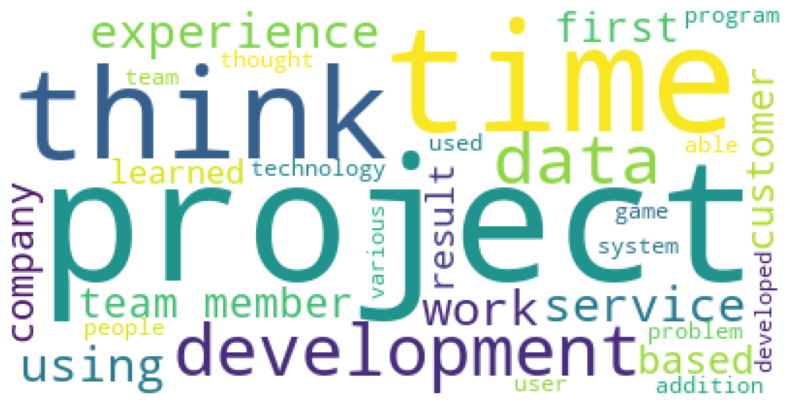

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(wc)
plt.axis("off")                                    # 축을 꺼줌.
plt.show()

In [12]:
# 백그라운드 마스크
#img = Image.open('background_1.png')                    # 타원형.
#img = Image.open('background_2.png')                   # 말풍선.
img = Image.open('background_3.png')                    # 하트.
#plt.imshow(img)
#plt.show()
back_mask = np.array(img)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\user\\Desktop\\NLP-project\\NLP-project\\NLP project\\background_3.png'

In [ ]:
wc = WordCloud(background_color='white', max_words=30, mask=back_mask)            # 바탕색, 단어 개수 등 설정.
# wc.generate(a_long_sentence);                                                   # 긴 문자열에서 생성.
wc.generate_from_frequencies(my_dict);                                            # 딕셔너리에서 생성.

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")                                    # 축을 꺼줌.
plt.show()